In [1]:
# Importing libraries 

import pandas as pd
from matplotlib import pyplot
import numpy as np

In [111]:
data = pd.read_csv(r"C:\Users\HELLO\Documents\X -INTERNSHIPS\iNeuron Internship\bank-additional-full.csv")  #Original Data
subs_data = data.groupby('y').get_group('yes')                                       #Subs_data refers to Subscribers Data
    
# Defining functions
    
def count_values(data, column_name):
    data_value_counts = data[column_name].value_counts().rename_axis(column_name).reset_index(name='count')
    data_value_counts['percentage'] = (data_value_counts['count']/sum(data_value_counts['count']))*100
    return data_value_counts
    
def leads_data(data, subs_data, column_name):
    leads = count_values(subs_data, column_name)
    leads['conversion %'] = (count_values(subs_data, column_name)['count']/count_values(data, column_name)['count'])*100
    return leads[[column_name,'count','conversion %']]

def get_chart(data, subs_data, column_name):
    pyplot.style.use('seaborn-pastel')
    pyplot.ylabel(column_name)
    pyplot.xlabel('Total Count')
    pyplot.barh(count_values(data, column_name)[column_name], count_values(data, column_name)['count'], label = "Total Leads", color = 'grey')
    pyplot.barh(count_values(subs_data, column_name)[column_name], count_values(subs_data, column_name)['count'], color = 'purple', label = "Total Subscriptions")
    pyplot.legend()
    pyplot.tight_layout()
        
def detail_chart(data, column_name):
    pyplot.style.use('seaborn-pastel')
    pyplot.xlabel(column_name)
    pyplot.ylabel('Total Count')
    pyplot.bar(count_values(data, column_name)[column_name],count_values(data, column_name)['count'],edgecolor = 'black')
    pyplot.tight_layout()
        
def describe_parameter(data, column_name):
    return data[column_name].describe()
    
def get_pie(data, column_name):
    pyplot.pie(count_values(data, column_name)['count'], labels = count_values(data, column_name)[column_name], wedgeprops = {'edgecolor' : 'grey'}, autopct = '%1.1f%%')
    pyplot.title("Customers who subscribed to term Deposits")
    pyplot.tight_layout()
        

In [157]:
# Overall Subscriber's Data Information
subs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 75 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4640 non-null   int64  
 1   job             4640 non-null   object 
 2   marital         4640 non-null   object 
 3   education       4640 non-null   object 
 4   credit default  4640 non-null   object 
 5   housing loan    4640 non-null   object 
 6   personal loan   4640 non-null   object 
 7   contact         4640 non-null   object 
 8   month           4640 non-null   object 
 9   day_of_week     4640 non-null   object 
 10  duration (s)    4640 non-null   int64  
 11  campaign        4640 non-null   int64  
 12  past days       4640 non-null   int64  
 13  previous        4640 non-null   int64  
 14  poutcome        4640 non-null   object 
 15  emp.var.rate    4640 non-null   float64
 16  cons.price.idx  4640 non-null   float64
 17  cons.conf.idx   4640 non-null  

                                  SUBSCRIBER'S DESCRIPTION AND INSIGHTS
                             

In [115]:
# AGE ANALYTICS

In [161]:
a = count_values(subs_data, 'age').sort_values(by = 'percentage', ascending = False).head(10)
a
# sum(a['percentage']) gives 38.8%

# Insight 1: 38.8% Subscribers are in the age group of (29 to 39)

,age,count,percentage
0,31,220,4.741379
1,33,210,4.525862
2,30,202,4.353448
3,29,186,4.008621
4,32,184,3.965517
5,34,184,3.965517
6,35,167,3.599138
7,36,154,3.318966
8,28,151,3.254310
9,38,143,3.081897


In [162]:
leads_data(data, subs_data, 'age').sort_values(by = 'conversion %', ascending = False).head(20).sort_values(by = 'age')

# Insight 2: In the age (60-90), the Leads conversion rate is maximum.

,age,count,conversion %
72,17,2,100.000000
59,18,12,46.153846
51,63,17,50.000000
41,66,29,44.615385
60,67,11,45.833333
57,73,13,46.428571
62,75,11,55.000000
58,77,13,48.148148
67,79,7,50.000000
50,80,18,52.941176


In [166]:
b = leads_data(data, subs_data, 'age').sort_values(by = 'conversion %').head(20).sort_values(by = 'age')
b
# b['conversion %'].mean()
# Insight 3: In the age (60-90), the Leads conversion rate is 5X as compared to age group (25-55).

,age,count,conversion %
21,24,86,9.828571
16,25,93,9.029126
11,26,122,9.546166
13,27,114,9.982487
6,35,167,9.743291
10,37,137,9.737029
9,38,143,9.986034
12,39,114,9.819121
22,40,84,9.870740
18,42,91,9.090909


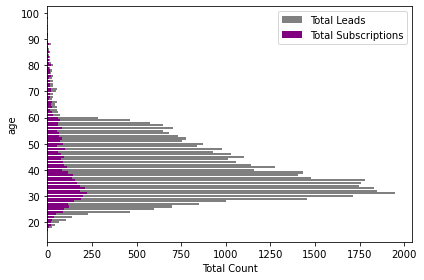

In [119]:
get_chart(data,subs_data, 'age')

# Insight 4: People in the age range of (30-35) are targeted maximum.

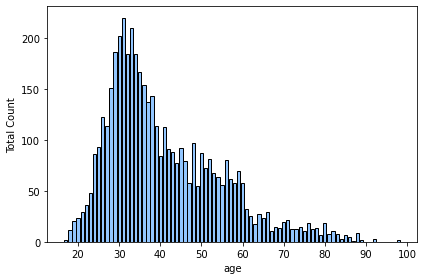

In [120]:
detail_chart(subs_data, 'age')

In [121]:
describe_parameter(subs_data, 'age')

count    4640.000000
mean       40.913147
std        13.837476
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

In [122]:
# JOB ANALYTICS

In [123]:
count_values(subs_data, 'job').sort_values(by = 'percentage', ascending = False)

# Insight 4: People who work in Administration, technician and Blue-collor jobs subscribe to term deposit the most. 
# Insight 5: People who are students, unemployed or housemaid subscribe to term deposit the least. 

,job,count,percentage
0,admin.,1352,29.137931
1,technician,730,15.732759
2,blue-collar,638,13.750000
3,retired,434,9.353448
4,management,328,7.068966
5,services,323,6.961207
6,student,275,5.926724
7,self-employed,149,3.211207
8,unemployed,144,3.103448
9,entrepreneur,124,2.672414


In [124]:
leads_data(data, subs_data, 'job').sort_values(by = 'conversion %', ascending = False)
# Insight 6: Students, services people and unemployed are easiest to get whereas technician, blue-collar and self employed are difficult to get subscribe. 

,job,count,conversion %
6,student,275,18.887363
5,services,323,18.779070
8,unemployed,144,13.584906
0,admin.,1352,12.972558
9,entrepreneur,124,12.228797
10,housemaid,106,12.114286
4,management,328,11.217510
11,unknown,37,11.212121
3,retired,434,10.934744
7,self-employed,149,10.485574


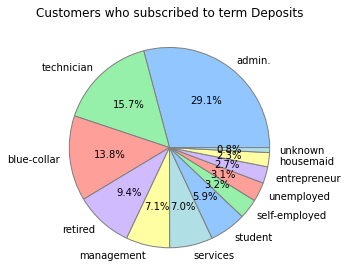

In [125]:
get_pie(subs_data, 'job')

In [126]:
describe_parameter(subs_data, 'job')

count       4640
unique        12
top       admin.
freq        1352
Name: job, dtype: object

In [127]:
# MARITAL STATUS ANALYTICS

In [128]:
subs_data['marital'].unique()

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [129]:
df_marital = subs_data['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Subscribers")
df_marital = df_marital.drop([3], axis = 0)
df_marital

,Marital Status,No of Subscribers
0,married,2532
1,single,1620
2,divorced,476


In [130]:
data_marital = data['marital'].value_counts().rename_axis("Marital Status").reset_index(name = "No of Customers")
data_marital = data_marital.drop([3], axis = 0)
data_marital

,Marital Status,No of Customers
0,married,24928
1,single,11568
2,divorced,4612


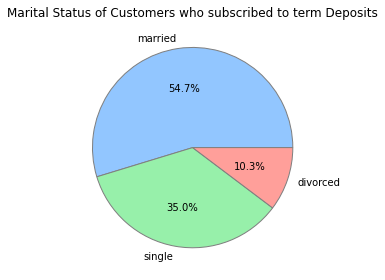

In [131]:
pyplot.pie(df_marital['No of Subscribers'], labels = df_marital['Marital Status'], 
           wedgeprops = {'edgecolor' : 'grey'}, autopct = '%1.1f%%')
pyplot.title("Marital Status of Customers who subscribed to term Deposits")
pyplot.tight_layout()

In [132]:
df_marital['Leads Conversion'] = df_marital['No of Subscribers']/data_marital['No of Customers']*100
df_marital
# Insight 6: Single people tend to subscribe term deposit the most. 

,Marital Status,No of Subscribers,Leads Conversion
0,married,2532,10.157253
1,single,1620,14.004149
2,divorced,476,10.320902


In [133]:
# EDUCATIONAL STATUS ANALYTICS

In [134]:
df_ed = subs_data['education'].value_counts().rename_axis('Education Level').reset_index(name = 'No of Subscribers')
df_ed

,Education Level,No of Subscribers
0,university.degree,1670
1,high.school,1031
2,professional.course,595
3,basic.9y,473
4,basic.4y,428
5,unknown,251
6,basic.6y,188
7,illiterate,4


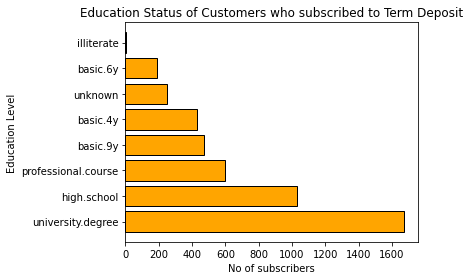

In [135]:
pyplot.barh(df_ed['Education Level'],df_ed['No of Subscribers'] , edgecolor = 'black', color = 'orange')
pyplot.ylabel('Education Level')
pyplot.xlabel('No of subscribers')
pyplot.title("Education Status of Customers who subscribed to Term Deposit")
pyplot.tight_layout()

# Insight 7: Well Educated people who have either University degree or went High school or have enrolled in professional course subscribe term deposits the most

In [136]:
# CREDIT DEFAULTS ANALYTICS

In [137]:
df_cd = subs_data['credit default'].value_counts().rename_axis('credit default status').reset_index(name = 'No of Subscribers')
df_cd
# Insight 8: All of the Customers who have subscribed term deposit have not defaulted on credit.

,credit default status,No of Subscribers
0,no,4197
1,unknown,443


In [138]:
# HOME LOAN AND PERSONAL LOAN ANALYTICS housing loan	personal loan

In [139]:
df_hl = subs_data['housing loan'].value_counts().rename_axis('Housing Loan Status').reset_index(name = 'No of Subscribers')
df_hl = df_hl.drop([2], axis = 0)
df_hl['% of Subscribers'] = df_hl['No of Subscribers']/sum(df_hl['No of Subscribers'])*100
df_hl
# Insight 9: Approximately half of the customers have a home loan on them.

,Housing Loan Status,No of Subscribers,% of Subscribers
0,yes,2507,55.305537
1,no,2026,44.694463


In [140]:
df_pl = subs_data['personal loan'].value_counts().rename_axis('personal loan status').reset_index(name = 'No of Subscribers')
df_pl = df_pl.drop([2], axis = 0)
df_pl['% of Subscribers'] = df_pl['No of Subscribers']/sum(df_pl['No of Subscribers'])*100
df_pl
# Insight 10: Only 15% of customers have personal loan on them.

,personal loan status,No of Subscribers,% of Subscribers
0,no,3850,84.932716
1,yes,683,15.067284


In [141]:
# NO OF TIMES CONTACTED & DURATION ANALYTICS

In [142]:
# All the values in minutes.
df_dur = subs_data['duration (s)']/60
df_dur.describe()

# Insight 11: Average duration per call for customers who subscribe to term deposit is 9.2 minutes, maximum call duration is 70 mins and minimum is 36 sec.

count    4640.000000
mean        9.219853
std         6.686198
min         0.616667
25%         4.216667
50%         7.483333
75%        12.354167
max        69.983333
Name: duration (s), dtype: float64

In [143]:
subs_data['campaign '].describe()

count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign , dtype: float64

In [144]:
df_cam = subs_data['campaign '].value_counts().rename_axis('No of times Contacted').reset_index(name = 'No of Subscribers')
df_cam['% of Subscribers'] = df_cam['No of Subscribers']/sum(df_cam['No of Subscribers'])*100
df_cam

# Insight 12: 50% of the customers subscribed within 1 contact and 88% of customers subscribed within 3 contacts during the campaign during the campaign for term deposit subscription.

,No of times Contacted,No of Subscribers,% of Subscribers
0,1,2300,49.568966
1,2,1211,26.099138
2,3,574,12.370690
3,4,249,5.366379
4,5,120,2.586207
5,6,75,1.616379
6,7,38,0.818966
7,9,17,0.366379
8,8,17,0.366379
9,10,12,0.258621


In [145]:
subs_data['poutcome'].value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [146]:
#   emp.var.rate: employment variation rate - quarterly indicator (numeric)
#   cons.price.idx: consumer price index - monthly indicator (numeric)     
#   cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
#   euribor3m: euribor 3 month rate - daily indicator (numeric)
#   nr.employed: number of employees - quarterly indicator (numeric)

In [147]:
# INDICATORS ANALYTICS

In [148]:
def describe_column(dataset, column_name):
    return dataset[column_name].describe()

In [149]:
# df['emp.var.rate'].describe()
describe_column(subs_data, 'emp.var.rate')

count    4640.000000
mean       -1.233448
std         1.623626
min        -3.400000
25%        -1.800000
50%        -1.800000
75%        -0.100000
max         1.400000
Name: emp.var.rate, dtype: float64

In [150]:
subs_data['cons.price.idx'].describe()

count    4640.000000
mean       93.354386
std         0.676644
min        92.201000
25%        92.893000
50%        93.200000
75%        93.918000
max        94.767000
Name: cons.price.idx, dtype: float64

In [151]:
subs_data['cons.conf.idx'].describe()

count    4640.000000
mean      -39.789784
std         6.139668
min       -50.800000
25%       -46.200000
50%       -40.400000
75%       -36.100000
max       -26.900000
Name: cons.conf.idx, dtype: float64

In [152]:
subs_data['euribor3m'].describe()

count    4640.000000
mean        2.123135
std         1.742598
min         0.634000
25%         0.849000
50%         1.266000
75%         4.406000
max         5.045000
Name: euribor3m, dtype: float64

In [153]:
subs_data['nr.employed'].describe()

count    4640.000000
mean     5095.115991
std        87.572641
min      4963.600000
25%      5017.500000
50%      5099.100000
75%      5191.000000
max      5228.100000
Name: nr.employed, dtype: float64

                                        INSIGHTS SUMMARY
Insight 1: 38.8% Subscribers are in the age group of (29 to 39)

Insight 2: In the age (60-90), the Leads conversion rate is maximum.

Insight 3: In the age (60-90), the Leads conversion rate is 5X as compared to age group (25-55).

Insight 4: People in the age range of (30-35) are targeted maximum.

Insight 5: People who work in Administration, technician and Blue-collor jobs subscribe to term deposit the most. 

Insight 6: People who are students, unemployed or housemaid subscribe to term deposit the least. 

Insight 7: Students, services people and unemployed are easiest to get whereas technician, blue-collar and self employed are difficult to get subscribe. 

Insight 8: Single people tend to subscribe term deposit the most. 

Insight 9: Well Educated people who have either University degree or went High school or have enrolled in professional course subscribe term deposits the most

Insight 10: All of the Customers who have subscribed term deposit have not defaulted on credit.

Insight 11: Approximately half of the customers have a home loan on them.

Insight 12: Only 15% of customers have personal loan on them.

Insight 13: Average duration per call for customers who subscribe to term deposit is 9.2 minutes, maximum call duration is 70 mins and minimum is 36 sec.

Insight 14: 50% of the customers subscribed within 1 contact.

Insight 15: 88% of customers subscribed within 3 contacts during the campaign during the campaign for term deposit subscription.




                                    THANK YOU!